In [1]:
import numpy as np
import imageio as imio
import matplotlib.pyplot as plt

Daniel Conrado Monroy Madrid 16012674

Si tienes algún error al ejecutar la celda anterior verifica que tu ambiente de anaconda tenga las librerías necesarias.

# Clasificación con K-nearest neighbors
En este notebook vamos a implementar K-nearest neighbor, nuestro algoritmo va a **clasificar** a que raza pertenece la imagen de un perro, para entrenar nuestro algoritmo vamos a utilizar un set de datos contiene imagenes de 120 razas de perros, en total son 10,222 imagenes.

Data: [Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification/data)

#### Pre-procesamiento

El pre-procesamiento ya fue realizado y el dataset preparado y esta listo para usarse, para esto se aplico un proceso conocido como "transfer learning" usando la red neuronal "Inception" de Google(tema a cubrirse en proximas clases)  , para esta tarea ignoremos este detalle  y pensemos que se nos da un dataset con features donde cada columna representa una característica de entrada importante,pero no nos interesa conocer los detalles. 

Estas features/características fueron almacenadas en un matriz de numpy.

En esta parte del notebook solo hay que ejecutar las celdas para cargar los datos, estos datos van a servir de entrada para nuestra implementación de K-nearest neighbors con tensorflow.

### Referencias opcionales para transfer learning y "Google inception"
##### Inception
https://www.tensorflow.org/tutorials/image_recognition

https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html

##### Transfer Learning
https://www.datacamp.com/community/tutorials/transfer-learning

In [2]:
images_inception_features = './training_inception_features_array.npy'
training_image_labels_array = './training_image_labels_array.npy'
training_image_names_array = './training_image_names_array.npy'

In [3]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array)
training_set_dict['label'] = np.load(training_image_labels_array)
training_set_dict['features'] = np.load(images_inception_features)


#  K-Nearest Neighbors

La data la vamos a manejar en los siguientes 3 arreglos: 

- features    : features de la imagen dadas por google Inception
- labels      : label de la imagen, identifica que raza es
- images_name : nombre de la imgen original, si descargan el dataset con link en la descripcion pueden buscar la imagen original por este nombre.

In [4]:
## Cargamos las features y las labes de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [5]:
len(labels)

10222

In [6]:
print(features.shape)


(10222, 2048)


Las labels pertenecientes a las features tienen el mismo indice, Ejemplo:

Label:  golden_retriever
Nombre:  0021f9ceb3235effd7fcde7f7538ed62


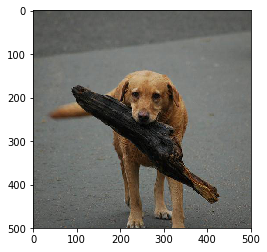

In [7]:
# Indice 4

print('Label: ',labels[4])

print('Nombre: ',images_name[4])

img = imio.imread('./'+images_name[4]+'.jpg')
plt.imshow(img)


### Implementa tu codigo de  K-Neighbors aqui:

El siguiente es un ejemplo de como puedes  definir tu función para predecir la raza sobre un punto x_predict ,a través de uscar los "k" vecinos mas cercanos en X_train y devolver como predicción el "y" que mas se repite(la moda) correspondiente a esos "k" valores de X_train , este "y" estará dado por Y_train.

Un ejemplo  de KNN en tensorflow: http://marubon-ds.blogspot.com/2017/09/knn-k-nearest-neighbors-by-tensorflow.html (este tiene diferencias, usar como guía no copiar literal, por ejemplo este usa una métrica de distancia diferente a la que debemos usar: distancia euclidiana )


#### Instrucciones:
1. Implementar KNN
2. Agregar el grafo de tensorboard
3. Ejecutar el modelo con las 2 imagenes de prueba.

In [8]:
import tensorflow as tf
from sklearn import preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [26]:
# Convertir label a integer
label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(labels)

# Implementar one hot encoder. 
onehot_encoder=OneHotEncoder(sparse=False)
integer_encoded=integer_encoded.reshape(len(integer_encoded), 1)
one_hot_encoded = onehot_encoder.fit_transform(integer_encoded)

C:\Users\LUCIA\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [35]:
yt=one_hot_encoded
x_test=features[0:2,:]

In [36]:
def predecir_raza_KNN(X_test,X_train,Y_train,k):
    x_train = tf.placeholder(dtype=tf.float32)
    y_train = tf.placeholder(dtype=tf.float32)
    x_test = tf.placeholder(dtype=tf.float32)
    distance=tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(x_train,tf.expand_dims(x_test,1))), reduction_indices=1)) #euclidian distance
    _,top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
    top_k_label = tf.gather(y_train, top_k_indices)
    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)
    session = tf.Session()
    prediction_outcome = session.run(prediction,feed_dict={x_train: X_train,x_test:X_test,y_train: Y_train})
    return prediction
    
    

In [37]:
print(predecir_raza_KNN(xtest,features,one_hot_encoded,7))

Tensor("ArgMax_9:0", dtype=int64)


In [38]:
inverted = label_encoder.inverse_transform([np.argmax(one_hot_encoded[4, :])])
print(inverted)

['golden_retriever']


In [39]:
inverted = label_encoder.inverse_transform([np.argmax(predecir_raza_KNN(xtest,features,one_hot_encoded,7))])
print(inverted)

['affenpinscher']


## Probamos el algoritmo con nuevas imagenes 

Como buena practica luego de entrenar nuestro algoritmo, lo probamos con imagenes que no ha visto antes 

In [20]:
test_features = np.load('./data/test/test_inception_features_array.npy')

In [21]:
predict_image = test_features[0]
predict_image

array([0.21109015, 0.2345307 , 0.1219456 , ..., 0.02583654, 0.05254849,
       0.4142693 ], dtype=float32)

In [34]:
inverted = label_encoder.inverse_transform([np.argmax(predecir_raza_KNN(predict_image,features,one_hot_encoded,7))])
print(inverted)

InvalidArgumentError: Incompatible shapes: [10222,2048] vs. [2048,1]
	 [[node Sub_8 (defined at <ipython-input-29-3224537a6801>:5) ]]

Caused by op 'Sub_8', defined at:
  File "C:\Users\LUCIA\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\LUCIA\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\LUCIA\Anaconda3\lib\asyncio\base_events.py", line 528, in run_forever
    self._run_once()
  File "C:\Users\LUCIA\Anaconda3\lib\asyncio\base_events.py", line 1764, in _run_once
    handle._run()
  File "C:\Users\LUCIA\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-3091cf06d938>", line 1, in <module>
    inverted = label_encoder.inverse_transform([np.argmax(predecir_raza_KNN(predict_image,features,one_hot_encoded,7))])
  File "<ipython-input-29-3224537a6801>", line 5, in predecir_raza_KNN
    distance=tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(x_train,tf.expand_dims(x_test,1))), reduction_indices=1)) #euclidian distance
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py", line 269, in subtract
    return gen_math_ops.sub(x, y, name)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 9535, in sub
    "Sub", x=x, y=y, name=name)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\Users\LUCIA\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Incompatible shapes: [10222,2048] vs. [2048,1]
	 [[node Sub_8 (defined at <ipython-input-29-3224537a6801>:5) ]]


### Prueba 1

In [ ]:
img_test = imio.imread('./data/test/test1.jpg')
plt.imshow(img_test)

In [ ]:
predict_image = test_features[0]

## Ejecuta tu modelo con la entrada de `predict_image`
# Deberiamos obtener: german_shepherd

### Prueba 2

In [ ]:
img_test = imio.imread('./data/test/test2.jpg')
plt.imshow(img_test)

In [ ]:
## Ejecuta tu modelo con la entrada de `predict_image`
# Deberiamos obtener: american_staffordshire_terrier #
predict_image = test_features[1]


In [ ]:
pwd